# Task 1.1 Data Understanding

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Dataset Loading

In [3]:
df_incidents = pd.read_csv('incidents.csv', sep=',', index_col=False, low_memory=False) # gun incidents in the USA
# Note: since the first column isn't a column of indexes (it's the date column), we set index_col=False

df_poverty = pd.read_csv('povertyByStateYear.csv', sep=',', index_col=False) # poverty percentage in the USA
# Note: the first column isn't a column of indexes

df_elections = pd.read_csv('year_state_district_house.csv', sep=',', index_col=False) # congressional elections in the USA
# Note: the first column isn't a column of indexes

In [7]:
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

In [8]:
print(df_poverty.head())

           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8


In [9]:
print(df_elections.head())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  


## Basic Statistics

In [10]:
df_incidents.info()
print()
df_poverty.info()
print()
df_elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [19]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [20]:
df_poverty.describe()

,year,povertyPercentage
count,884.000000,832.000000
mean,2011.998869,12.535817
std,4.902330,3.205233
min,2004.000000,5.400000
25%,2008.000000,10.200000
50%,2012.000000,12.000000
75%,2016.000000,14.700000
max,2020.000000,21.800000


In [18]:
df_elections.describe()

,year,congressional_district,candidatevotes,totalvotes
count,10441.000000,10441.000000,1.044100e+04,1.044100e+04
mean,1999.002011,9.873096,1.345276e+05,2.076422e+05
std,13.845898,10.017078,5.160721e+04,8.262643e+04
min,1976.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,1988.000000,3.000000,1.004870e+05,1.554510e+05
50%,2000.000000,6.000000,1.290850e+05,2.004450e+05
75%,2012.000000,13.000000,1.653710e+05,2.555770e+05
max,2022.000000,53.000000,1.165136e+06,2.656104e+06


In [11]:
# Here we justify why the date column in df_incidents can't be used as index column

print("Number of distinct values in 'date': \t", df_incidents.date.nunique())

# Since there are 239677 incidents, and it turns out that there are 2437 distinct dates, we deduce that on certain dates multiple incidents occurred. In conclusion, the dates are not a unique identifier for the incidents.

Number of distinct values in 'date': 	 2437


In [12]:
# Missing values detection

df_incidents.isnull().any()

date                         False
state                        False
city_or_county               False
address                       True
latitude                      True
longitude                     True
congressional_district        True
state_house_district          True
state_senate_district         True
participant_age1              True
participant_age_group1        True
participant_gender1           True
min_age_participants          True
avg_age_participants          True
max_age_participants          True
n_participants_child          True
n_participants_teen           True
n_participants_adult          True
n_males                       True
n_females                     True
n_killed                     False
n_injured                    False
n_arrested                    True
n_unharmed                    True
n_participants               False
notes                         True
incident_characteristics1     True
incident_characteristics2     True
dtype: bool

In [13]:
df_poverty.isnull().any()

state                False
year                 False
povertyPercentage     True
dtype: bool

In [14]:
df_elections.isnull().any()

year                      False
state                     False
congressional_district    False
party                     False
candidatevotes            False
totalvotes                False
dtype: bool

## Identification of outliers

### Incidents

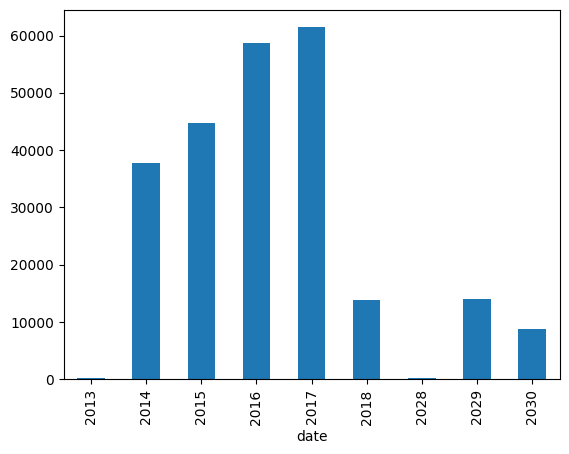

In [28]:
# We want to identify the dates in df_incidents that are erroneous

df_incidents.date = pd.to_datetime(df_incidents.date, errors='coerce') # the invalid dates are set to NaT (=Not a Time)

df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar')
plt.show()

# From the following histogram we deduce that there are some incidents that should have happened after 2023 (the year we are in), so it is certainly impossible for us to have this data today

In [ ]:
# We eliminate the incidents with year > 2018 (?)

### Poverty

In [4]:
print("Distinct Values in state: \t", df_poverty.state.unique())

Distinct Values in state: 	 ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [6]:
print("Distinct Values in state: \t", df_poverty.state.nunique())
# We notice that there are 52 states, however the USA has 50 distinct states
# Observing the distinct values we notice that there are 2 erroneous instances: 'United States', and 'District of Columbia'

Distinct Values in state: 	 52


### Elections

In [26]:
print("Distinct Values in state: \t", df_elections.state.unique())

Distinct Values in state: 	 ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'
 'DISTRICT OF COLUMBIA']


In [25]:
print("Distinct Values in state: \t", df_elections.state.nunique())
# There is an erroneous instance: 'DISTRICT OF COLUMBIA'

Distinct Values in state: 	 51


## Distributions

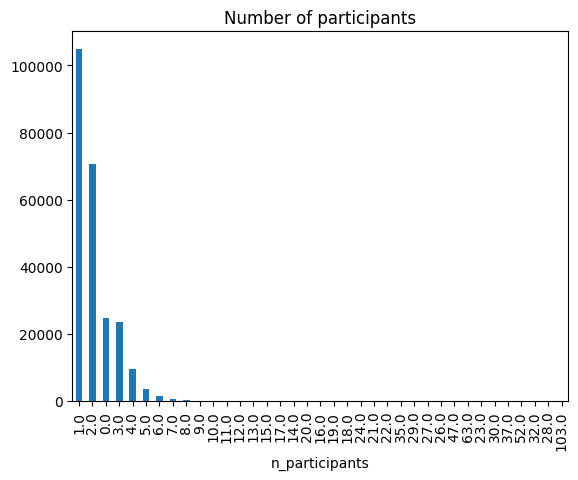

In [15]:
df_incidents['n_participants'].value_counts().plot(kind='bar', title='Number of participants')
plt.show()

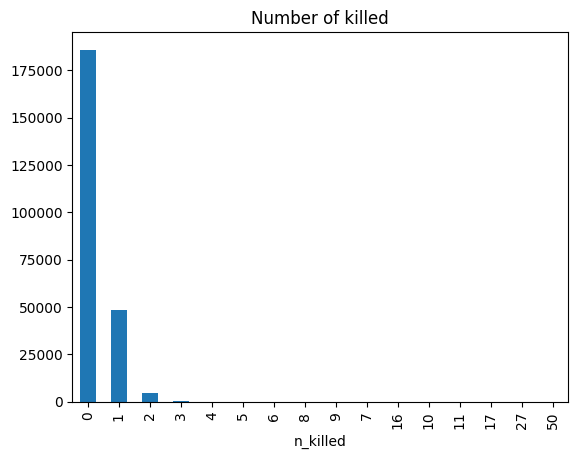

In [16]:
df_incidents['n_killed'].value_counts().plot(kind='bar', title='Number of killed')
plt.show()